In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Chargement des données

circonscriptions_2014 = pd.read_csv("data/2014/circonscriptions.csv", encoding="ISO-8859-1", sep=";")
votes_candidats_2014 = pd.read_csv("data/2014/candidats.csv", encoding="ISO-8859-1", sep=";")

In [3]:
# Affichage des titres de chacune des colonnes

print(circonscriptions_2014.columns)
print(votes_candidats_2014.columns)

Index(['Numéro de la circonscription', 'Nom de la circonscription',
       'Dernière date de mise à jour au format ISO 8601', 'Résultats finaux',
       'Nombre de bureaux complétés', 'Nombre total de bureaux',
       'Nombre de votes valides', 'Nombre de votes rejetés',
       'Nombre de votes exercés', 'Nombre d'électeurs inscrits',
       'Taux de vote valide', 'Taux de vote rejeté', 'Taux de participation'],
      dtype='object')
Index(['Numéro de la circonscription', 'Numéro du candidat', 'Nom', 'Prénom',
       'Numéro du parti politique', 'Abréviation du parti politique',
       'Nombre total de votes', 'Taux de vote', 'Nombre de votes en avance'],
      dtype='object')


In [4]:
# Affichage des cinq premières lignes, histoire de voir de quoi les données ont l'air

circonscriptions_2014.head()

,Numéro de la circonscription,Nom de la circonscription,Dernière date de mise à jour au format ISO 8601,Résultats finaux,Nombre de bureaux complétés,Nombre total de bureaux,Nombre de votes valides,Nombre de votes rejetés,Nombre de votes exercés,Nombre d'électeurs inscrits,Taux de vote valide,Taux de vote rejeté,Taux de participation
0,579,Abitibi-Est,"2014-04-15T02:24:38,653-04:00",True,143,143,20626,525,21151,33638,97.52,2.48,62.88
1,573,Abitibi-Ouest,"2014-04-15T02:24:38,653-04:00",True,164,164,21947,468,22415,35382,97.91,2.09,63.35
2,437,Acadie,"2014-04-15T02:24:38,653-04:00",True,195,195,34121,318,34439,49413,99.08,0.92,69.70
3,373,Anjou-Louis-Riel,"2014-04-15T02:24:38,653-04:00",True,135,135,31588,454,32042,43718,98.58,1.42,73.29
4,535,Argenteuil,"2014-04-15T02:24:38,653-04:00",True,153,153,30527,443,30970,44931,98.57,1.43,68.93


In [5]:
# La colonne de mise à jour au format ISO 8601 n'est pas utile pour le travail à venir, tout comme le booléen pour les résultats finaux

circonscriptions_2014 = circonscriptions_2014.drop(columns=['Dernière date de mise à jour au format ISO 8601', 'Résultats finaux'])

# Afin d'alléger le reste de la prodécure, je renomme une des colonnes

votes_candidats_2014 = votes_candidats_2014.rename(columns={'Abréviation du parti politique': 'Parti politique'})

In [6]:
# Vérification de l'intégrité des données

# Il devrait normalement y avoir 125 lignes, une par circonscription électorale au Québec, et les colonnes Numéro et Nom de la circonscriptions devraient êtres uniques

print("Nombre de circonscriptions(lignes) dans le dataset : ", len(circonscriptions_2014))
numero_unique = circonscriptions_2014['Numéro de la circonscription'].is_unique
nom_unique = circonscriptions_2014['Nom de la circonscription'].is_unique

print("Les numéros de circonscriptions sont-ils uniques? ", numero_unique)
print("Les noms de circonscriptions sont-ils uniques? ", nom_unique)

Nombre de circonscriptions(lignes) dans le dataset :  125
Les numéros de circonscriptions sont-ils uniques?  True
Les noms de circonscriptions sont-ils uniques?  True


In [7]:
# Quelles sont les circonscriptions avec le plus haut et le plus faible taux de participation?
# On commence d'abord par isoler les colonnes utiles, ici le nom de la circonscription et le taux de participation

taux_participation_2014 = (circonscriptions_2014.iloc[:,[1,10]]).sort_values(by='Taux de participation', ascending=False)

# Ensuite on divise en quintile, en ajoutant +1 pour avoir des quintiles de 1 à 5 plutôt que de 0 à 4
taux_participation_2014['quintile'] = pd.qcut(taux_participation_2014['Taux de participation'], q=5, labels=False) + 1

# On affiche toutes les circonscriptions du quintile avec le taux de participation le plus élevé
print("Les circonscriptions se trouvant dans le quintile avec le plus haut taux de participation sont : ")
print(taux_participation_2014[taux_participation_2014['quintile'] == 5])
print("-------------------------------------------------------------------------------------------------")

# Ensuite celle dans le dernier quintile
print("Les circonscriptions se trouvant dans le quintile avec le plus bas taux de participation sont : ")
print(taux_participation_2014[taux_participation_2014['quintile'] == 1])

Les circonscriptions se trouvant dans le quintile avec le plus haut taux de participation sont : 
    Nom de la circonscription  Taux de participation  quintile
66               Louis-Hébert                  83.66         5
77                Montarville                  83.17         5
46            Jacques-Cartier                  81.18         5
27     Chutes-de-la-Chaudière                  81.06         5
80                   Nelligan                  78.61         5
123                    Vimont                  78.48         5
59                 La Prairie                  78.27         5
108               Sainte-Rose                  78.23         5
119                 Vaudreuil                  77.99         5
49                 Jean-Talon                  77.94         5
75                 Mille-Îles                  77.30         5
35                      Fabre                  77.23         5
56                 La Peltrie                  77.15         5
45       Îles-de-la-

In [8]:
# Trouver candidat vainqueur pour chaque circonscription (votes en avance plus grand que zéro)

vainqueurs_2014 = votes_candidats_2014[votes_candidats_2014['Nombre de votes en avance'] > 0]

In [9]:
# Trouver le résultats des élections en terme de nombre de candidats élus

candidats_elus_parparti_2014 = vainqueurs_2014['Parti politique'].value_counts()

print(candidats_elus_parparti_2014.to_string())

Parti politique
P.L.Q./Q.L.P.    70
P.Q.             30
C.A.Q.-É.F.L.    22
Q.S.              3


Parti politique
B.P.                  2690
C.A.Q.-É.F.L.       975607
Ind                  15361
M.P.Q.                 521
O.N. - P.I.Q.        30697
P.I.                   126
P.L.Q./Q.L.P.      1757071
P.M.L.Q.              2016
P.N.                  7539
P.Q.               1074120
P.S.P.                1291
P.U.N.                 241
P.V.Q./G.P.Q.        23163
P.Éq.                 1645
Q.R.D.                 163
Q.S.                323124
U.C.Q./Q.C.U.           58
É.A.                   400
É.A.P. - P.C.Q.      16429
Name: Nombre total de votes, dtype: int64


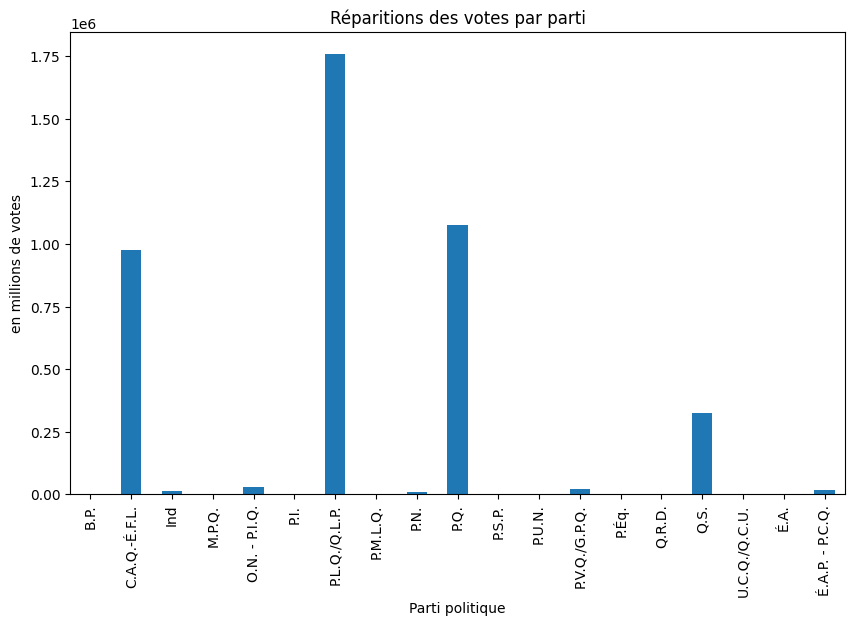

In [10]:
# Maintenant le résultat des élections, en nombre de votes par parti

total_votes_parparti_2014 = votes_candidats_2014.groupby('Parti politique')['Nombre total de votes'].sum()
print(total_votes_parparti_2014)
total_votes_parparti_2014.plot(kind='bar', figsize=(10, 6))
plt.title("Réparitions des votes par parti")
plt.ylabel("en millions de votes")
plt.show()

In [11]:
# Intéressant à regarder:  la différence entre le résultat du vote populaire versus les sièges obtenus.
# Le vote populaire étant le suffrage effectivement reçu.  Cela nous donnerait une idée de ce que serait la répartition
# des partis si on changeait le mode électoral pour quelque chose de plus portionnel.  J'en profite pour signaler une
# initiative pancanadienne qui milite pour ce genre de chose : https://www.fairvote.ca/fr/

total_sieges_2014 = candidats_elus_parparti_2014.values.sum()
proportion_sieges_2014 = candidats_elus_parparti_2014 / total_sieges_2014 * 100

print("Proportion des sièges obtenus (en pourcentage) : ")
print(proportion_sieges_2014)

print("Proportion des votes reçus (en pourcentage : ")
proportion_vote_2014 = total_votes_parparti_2014 / total_votes_parparti_2014.sum() * 100
print(proportion_vote_2014)

Proportion des sièges obtenus (en pourcentage) : 
Parti politique
P.L.Q./Q.L.P.    56.0
P.Q.             24.0
C.A.Q.-É.F.L.    17.6
Q.S.              2.4
Name: count, dtype: float64
Proportion des votes reçus (en pourcentage : 
Parti politique
B.P.                0.063559
C.A.Q.-É.F.L.      23.051668
Ind                 0.362950
M.P.Q.              0.012310
O.N. - P.I.Q.       0.725310
P.I.                0.002977
P.L.Q./Q.L.P.      41.516121
P.M.L.Q.            0.047634
P.N.                0.178132
P.Q.               25.379336
P.S.P.              0.030504
P.U.N.              0.005694
P.V.Q./G.P.Q.       0.547296
P.Éq.               0.038868
Q.R.D.              0.003851
Q.S.                7.634783
U.C.Q./Q.C.U.       0.001370
É.A.                0.009451
É.A.P. - P.C.Q.     0.388185
Name: Nombre total de votes, dtype: float64


In [12]:
# Avec un vote proportionnel donc, la composition de l'Assemblée Nationale serait très différente.  Le gouvernement élu
# aurait notamment été minoritaire.

In [13]:
# Trouver le candidat élu avec le moins de votes

elu_moinsdevotes_2014 = vainqueurs_2014.loc[vainqueurs_2014['Nombre total de votes'].idxmin()]
print(elu_moinsdevotes_2014)

Numéro de la circonscription              733
Numéro du candidat                        446
Nom                                  Chevarie
Prénom                                Germain
Numéro du parti politique                   6
Parti politique                 P.L.Q./Q.L.P.
Nombre total de votes                    4137
Taux de vote                            50.07
Nombre de votes en avance                 818
Name: 292, dtype: object


In [16]:
print(circonscriptions_2014[circonscriptions_2014['Numéro de la circonscription'] == 733])

    Numéro de la circonscription Nom de la circonscription  \
45                           733      Îles-de-la-Madeleine   

    Nombre de bureaux complétés  Nombre total de bureaux  \
45                           51                       51   

    Nombre de votes valides  Nombre de votes rejetés  Nombre de votes exercés  \
45                     8263                       96                     8359   

    Nombre d'électeurs inscrits  Taux de vote valide  Taux de vote rejeté  \
45                        10855                98.85                 1.15   

    Taux de participation  
45                  77.01  


In [17]:
# Tâchons de comparer maintenant tous les candidats vainqueurs par le nombre de votes obtenus

vainqueurs_triespartotalvotes_2014 = vainqueurs_2014[['Prénom', 'Nom', 'Nombre total de votes']].sort_values(by='Nombre total de votes', ascending=False)
vainqueurs_triespartotalvotes_2014['nom complet'] = vainqueurs_triespartotalvotes_2014['Prénom'] + ' ' + vainqueurs_triespartotalvotes_2014['Nom']

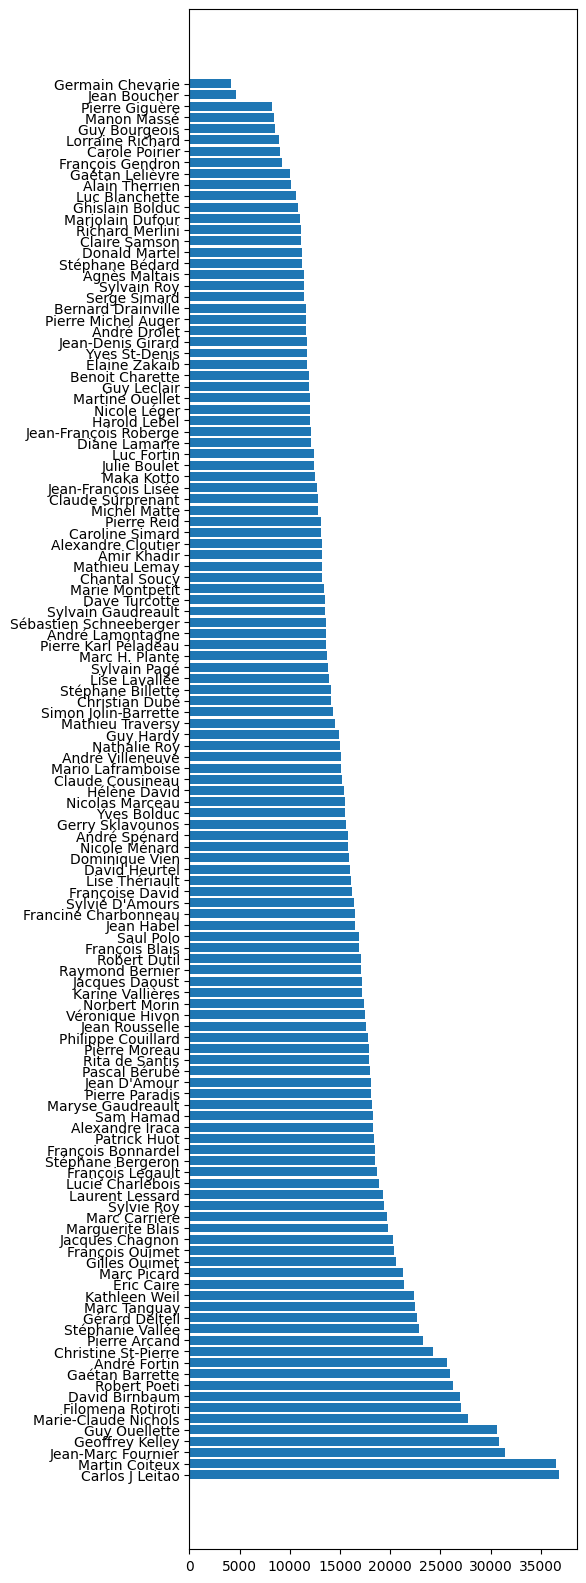

In [18]:
plt.figure(figsize=(5, 20))
plt.barh(vainqueurs_triespartotalvotes_2014['nom complet'], vainqueurs_triespartotalvotes_2014['Nombre total de votes'])
plt.show()

In [19]:
# Ceci dit étant donné que les circonscriptions n'ont pas toute le même nombre d'électeurs. Le résultat précédent
# n'est pas aussi intéressant qu'il en a l'air, surtout si on ajoute le fait que le taux de participation est vraiment inégal.

In [21]:
# Regardons maintenant le taux de vote pour le candidat gagnant dans chacune des circonscriptions et le nombre de votes en 
# avance pour le vainqueur dans chacune d'elles.

comparaison_avance_taux_partaux_2014 = vainqueurs_2014[['Numéro de la circonscription', 'Nombre de votes en avance', 'Taux de vote']].sort_values(by='Taux de vote')
comparaison_avance_taux_paravance_2014 = vainqueurs_2014[['Numéro de la circonscription', 'Nombre de votes en avance', 'Taux de vote']].sort_values(by='Nombre de votes en avance')

print("Les cinq circonscriptions avec le plus bas taux de vote.")

print(comparaison_avance_taux_partaux_2014.head())

# Il semble y avoir une tendance à avoir moins d'avance lorsque le taux de vote est plus bas, ce qui a du sens quand on y 
# pense.

print("\nLes cinq circonscriptions avec le plus taux de vote.")

print(comparaison_avance_taux_partaux_2014.tail())

print("\nLes cinq circonscriptions avec l'avance la plus basse.")

print(comparaison_avance_taux_paravance_2014.head())

print("\nLes cinq circonscriptions avec les plus hautes avances.")

print(comparaison_avance_taux_paravance_2014.tail())


Les cinq circonscriptions avec le plus bas taux de vote.
     Numéro de la circonscription  Nombre de votes en avance  Taux de vote
689                           389                         91         30.60
259                           481                        256         30.85
734                           633                        451         31.66
670                           189                        563         32.44
664                           263                       1222         32.74

Les cinq circonscriptions avec le plus taux de vote.
     Numéro de la circonscription  Nombre de votes en avance  Taux de vote
682                           417                      28348         82.28
810                           391                      18703         83.20
297                           409                      28695         85.42
616                           413                      34602         87.27
200                           403                      26267    

In [22]:
# Jetons un oeil sur les moyennes et médianes.

print("Taux de vote moyen : ", comparaison_avance_taux_partaux_2014['Taux de vote'].mean())
print("Taux de vote médian : ", comparaison_avance_taux_partaux_2014['Taux de vote'].median())
print("Avance moyenne : ", comparaison_avance_taux_paravance_2014['Nombre de votes en avance'].mean())
print("Avance médiane : ", comparaison_avance_taux_paravance_2014['Nombre de votes en avance'].median())

Taux de vote moyen :  47.765359999999994
Taux de vote médian :  44.2
Avance moyenne :  7225.952
Avance médiane :  4978.0


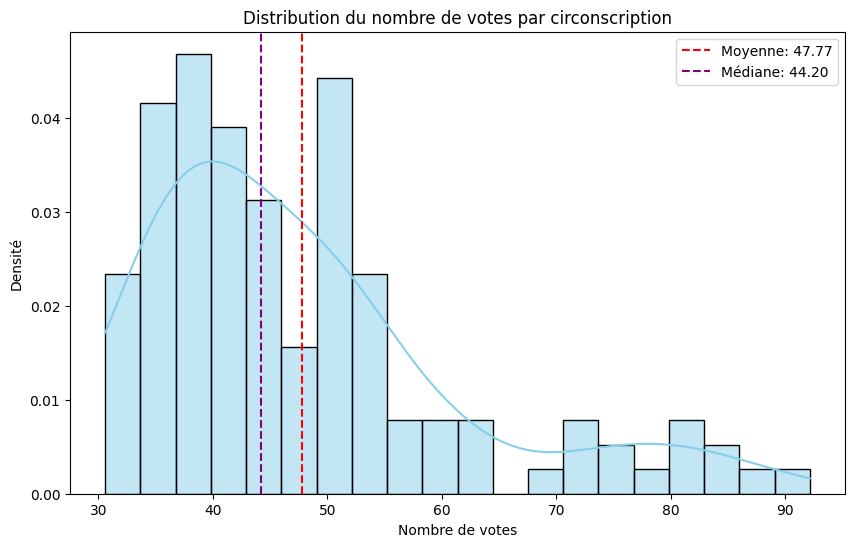

In [24]:
# On note que la moyenne ressemble à la médiane, ce qui laisse croire qu'on a quelque chose pas trop loin d'une courbe 
# normale. Ceci dit on regarde ici le taux de vote pour le vainqueur dans une circonscription.

plt.figure(figsize=(10, 6))
sns.histplot(vainqueurs_2014['Taux de vote'], kde=True, stat="density", bins=20, color='skyblue')

# Ajouter une ligne pour la moyenne et la médiane
moyenne = vainqueurs_2014['Taux de vote'].mean()
plt.axvline(moyenne, color='red', linestyle='--', label=f'Moyenne: {moyenne:.2f}')
mediane = vainqueurs_2014['Taux de vote'].median()
plt.axvline(mediane, color='purple', linestyle='--', label=f'Médiane: {mediane:.2f}')

plt.title("Distribution du nombre de votes par circonscription")
plt.xlabel("Nombre de votes")
plt.ylabel("Densité")
plt.legend()
plt.show()

In [25]:
# On constate qu'il y a une asymétrie avec un coefficient positif.

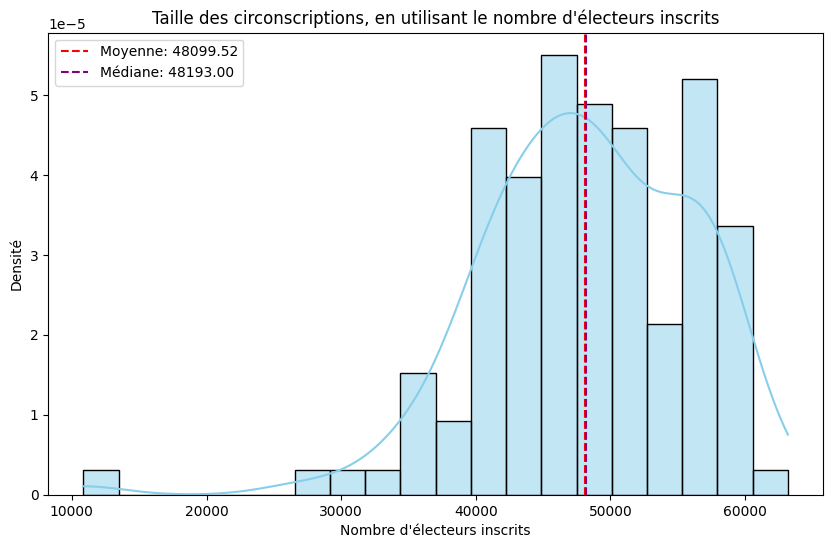

In [26]:
# Autre chose intéressante à explorer : la taille des circonscriptions.

plt.figure(figsize=(10, 6))
sns.histplot(circonscriptions_2014['Nombre d\'électeurs inscrits'], kde=True, stat="density", bins=20, color='skyblue')

# Ajouter une ligne pour la moyenne
moyenne = circonscriptions_2014['Nombre d\'électeurs inscrits'].mean()
plt.axvline(moyenne, color='red', linestyle='--', label=f'Moyenne: {moyenne:.2f}')
mediane = circonscriptions_2014['Nombre d\'électeurs inscrits'].median()
plt.axvline(mediane, color='purple', linestyle='--', label=f'Médiane: {mediane:.2f}')

plt.title("Taille des circonscriptions, en utilisant le nombre d'électeurs inscrits")
plt.xlabel("Nombre d'électeurs inscrits")
plt.ylabel("Densité")
plt.legend()
plt.show()

In [23]:
# Parmis les critères qu'utilisent la Commission de la représentation électorale il y a entre autres l'aspect
# du nombre d'électeurs qui doit être le plus équitable possible.  Ce n'est pas surprenant donc que la majorité
# des circonscriptions se retrouvent à plus ou moins 10 000 électeurs de la moyenne.
# Mais qu'elles sont les circonscriptions sous la barre des 40 000 électeurs?

circonscriptions_moins_40000_2014 = circonscriptions_2014[circonscriptions_2014['Nombre d\'électeurs inscrits'] < 40000].sort_values(by='Nombre d\'électeurs inscrits', ascending=False)
print(circonscriptions_moins_40000_2014[['Nom de la circonscription', 'Nombre d\'électeurs inscrits']])

    Nom de la circonscription  Nombre d'électeurs inscrits
124     Westmount-Saint-Louis                        39736
109                 Sanguinet                        39658
81          Nicolet-Bécancour                        39638
84                  Outremont                        39580
34                  Duplessis                        38784
73                   Mégantic                        38589
107             Saint-Maurice                        36712
13                Bonaventure                        36179
63                 Laviolette                        35771
1               Abitibi-Ouest                        35382
89              René-Lévesque                        34459
0                 Abitibi-Est                        33638
36                      Gaspé                        30850
116                    Ungava                        26786
45       Îles-de-la-Madeleine                        10855


In [27]:
# Il faudrait examiner une par une ces circonscriptions pour comprendre pourquoi celles-ci sont à ce point plus petites
# que la moyenne.  Mon hypothèse est que la situation géographique et les divisions administratives ont été des 
# facteurs déterminants (je sais que c'est le cas notamment pour les Îles-de-la-Madelaine, considéré comme une 
# circonscription "protégée").

In [28]:
# Quels sont les partis ayant remporté un nombre appréciable de votes dans chaque circonscriptions?  Disons au moins 5%.
# Au départ, pour tout le Québec, on a le portrait suivant : 

total_votes = total_votes_parparti_2014.sum()
print((total_votes_parparti_2014 / total_votes) * 100)

Parti politique
B.P.                0.063559
C.A.Q.-É.F.L.      23.051668
Ind                 0.362950
M.P.Q.              0.012310
O.N. - P.I.Q.       0.725310
P.I.                0.002977
P.L.Q./Q.L.P.      41.516121
P.M.L.Q.            0.047634
P.N.                0.178132
P.Q.               25.379336
P.S.P.              0.030504
P.U.N.              0.005694
P.V.Q./G.P.Q.       0.547296
P.Éq.               0.038868
Q.R.D.              0.003851
Q.S.                7.634783
U.C.Q./Q.C.U.       0.001370
É.A.                0.009451
É.A.P. - P.C.Q.     0.388185
Name: Nombre total de votes, dtype: float64


In [29]:
candidats_plusdecinq = votes_candidats_2014[votes_candidats_2014['Taux de vote'] > 5]
candidats_plusdecinq = candidats_plusdecinq.drop(columns=['Numéro du parti politique', 'Nombre de votes en avance', 'Numéro du candidat'])    

print(candidats_plusdecinq)

     Numéro de la circonscription         Nom     Prénom Parti politique  \
0                             579   Bourgeois        Guy   P.L.Q./Q.L.P.   
1                             579    Larouche  Élizabeth            P.Q.   
2                             579      Martel    Sylvain   C.A.Q.-É.F.L.   
3                             579      Dufour    Valérie            Q.S.   
6                             573     Gendron   François            P.Q.   
..                            ...         ...        ...             ...   
803                           449     Poirier       Jean            P.Q.   
804                           449      Dydzak     Joseph   C.A.Q.-É.F.L.   
810                           391     Chagnon    Jacques   P.L.Q./Q.L.P.   
811                           391     Laroche     Denise            P.Q.   
812                           391  Desjardins    Mélissa            Q.S.   

     Nombre total de votes  Taux de vote  
0                     8476         41.09  
1

In [27]:
# Tentons d'avoir une vue d'ensemble, comme par exemple, extraire la liste des partis ayant eu au moins 
# 5% des voix dans une circonscriptions

#total_votes_parparti_2014 = votes_candidats_2014.groupby('Parti politique')['Nombre total de votes'].sum()

partis_aumoinscinq = candidats_plusdecinq['Parti politique'].unique()
print(partis_aumoinscinq)

['P.L.Q./Q.L.P.' 'P.Q.' 'C.A.Q.-É.F.L.' 'Q.S.' 'Ind']


In [28]:
# On note qu'il y a eut au moins un candidat indépendant qui a reçu un nombre intéressant de votes,
# tentons de les identifier.

print(candidats_plusdecinq[candidats_plusdecinq['Parti politique'] == "Ind"])

     Numéro de la circonscription          Nom  Prénom Parti politique  \
170                           763    Pettersen    Marc             Ind   
371                           203  Houda-Pepin  Fatima             Ind   

     Nombre total de votes  Taux de vote  
170                   3601         11.04  
371                  10452         23.47  
